<a href="https://colab.research.google.com/github/YogithaR26/DeepLearning/blob/main/Experiment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
(X_train, y_train), (X_test, y_test)=cifar10.load_data()
print(f"X_train_shape: {X_train.shape}")
print(f"y_train_shape: {y_train.shape}")
print(f"X_test_shape: {X_test.shape}")
print(f"y_test_shape: {y_test.shape}")

X_train_shape: (50000, 32, 32, 3)
y_train_shape: (50000, 1)
X_test_shape: (10000, 32, 32, 3)
y_test_shape: (10000, 1)


<ipython-input-16-7ca4855ebf57>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


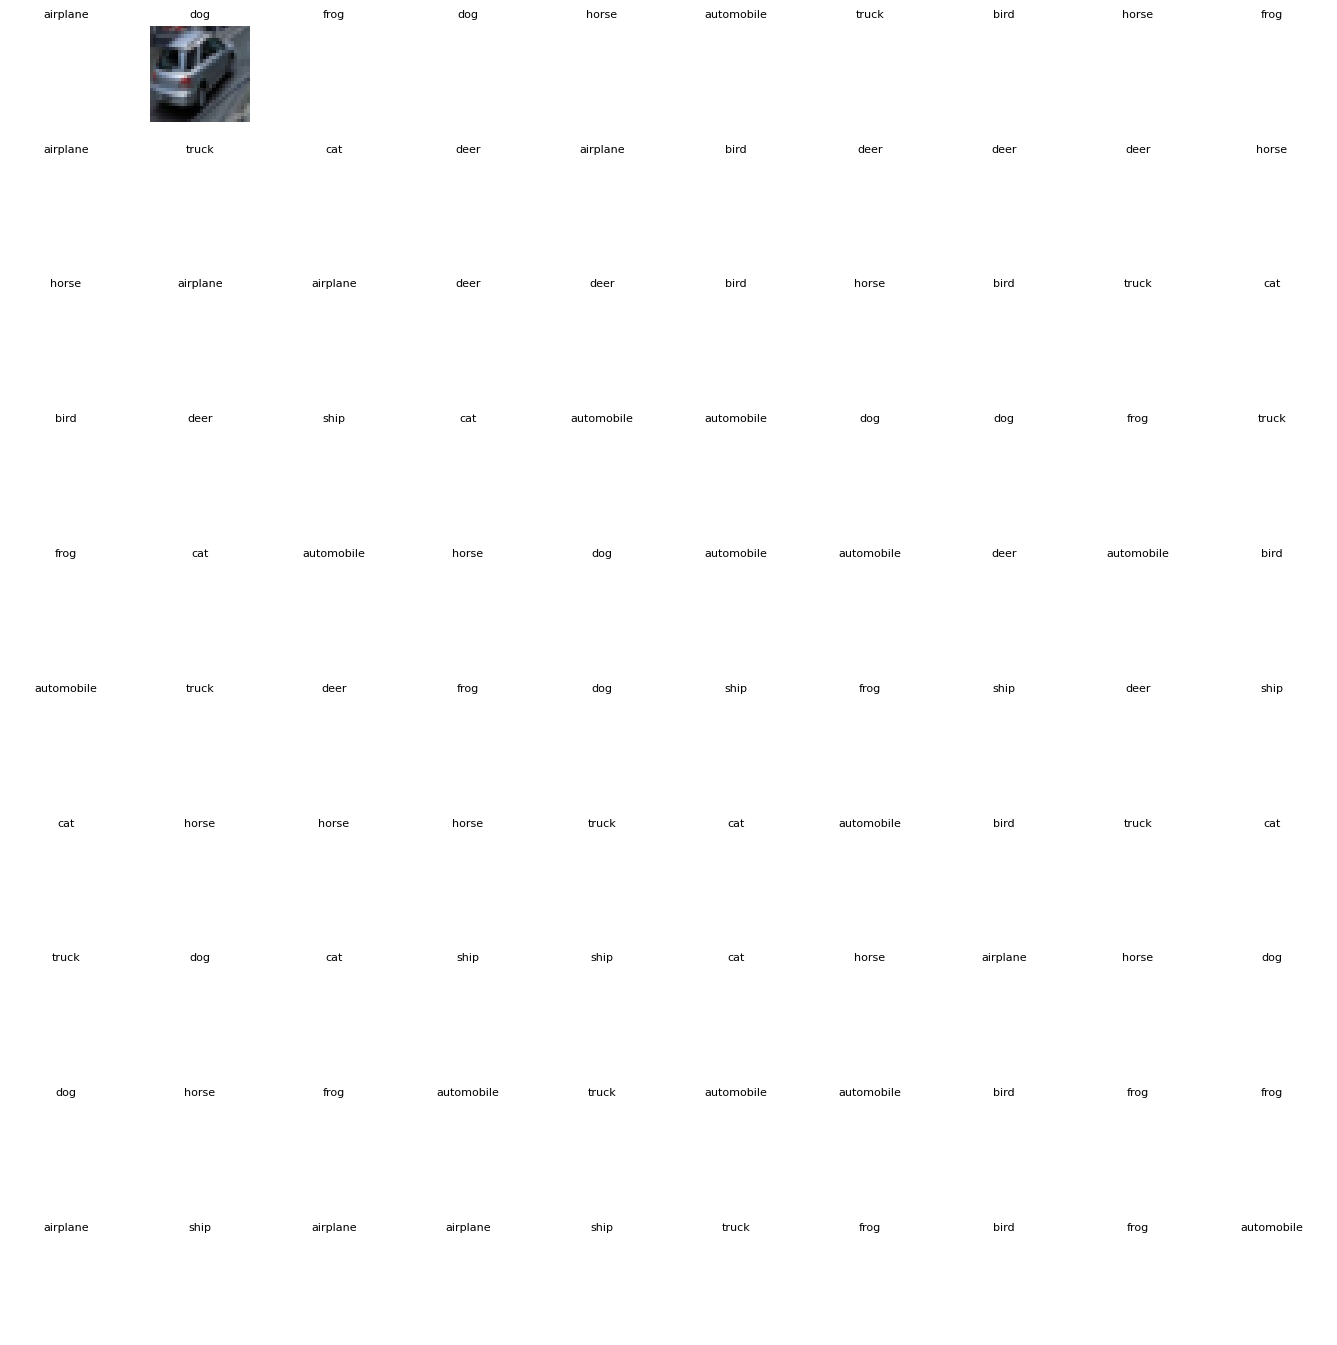

In [16]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
W_grid = 10
L_grid = 10
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_train = len(X_train)
for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_train)
  axes[1].imshow(X_train[index, 1:])
  label_index = int(y_train[index])
  axes[i].set_title(labels[label_index], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)


Text(0.5, 1.0, 'Class distribution in training set')

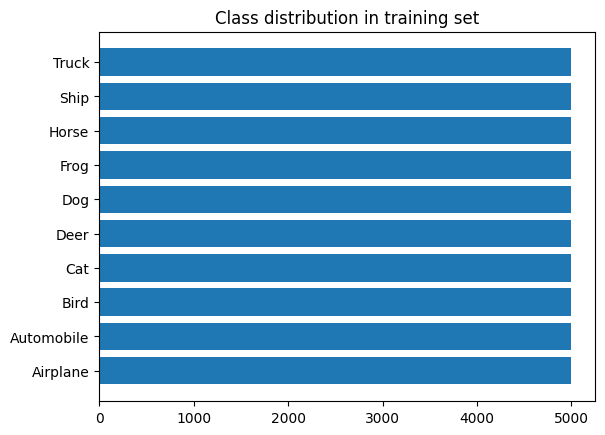

In [18]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog','Horse', 'Ship', 'Truck']
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')


In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.2
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)
print(y_train)
print(y_cat_train)


[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [33]:
#model building
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()
#Convolutional Layer
#layer-1
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
#Pooling layer
model.add(MaxPool2D(pool_size=(2, 21)))
#Dropout layers
model.add(Dropout(0.25))
#layer-2
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
#Pooling layer
model.add(MaxPool2D(pool_size=(2, 1)))
model.add(Dropout(0.25))
# layer-3
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())

#flatten
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
METRICS = ['accuracy', tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_33 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_34 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 16, 1, 32)         0         
 ng2D)                                                           
                                                      

In [41]:
# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Data Augmentation
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size=batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r=model.fit(train_generator,
          epochs=5,
          steps_per_epoch=steps_per_epoch,
          validation_data=(X_test, y_cat_test),
          callbacks=[early_stop])


Epoch 1/5
1562/1562 [==============================] - 206s 132ms/step - loss: 1.1529 - accuracy: 0.5950 - precision: 0.7402 - recall: 0.4435 - val_loss: 1.0229 - val_accuracy: 0.6405 - val_precision: 0.7552 - val_recall: 0.5258
Epoch 2/5
1562/1562 [==============================] - 203s 130ms/step - loss: 1.1220 - accuracy: 0.6058 - precision: 0.7473 - recall: 0.4584 - val_loss: 1.0608 - val_accuracy: 0.6264 - val_precision: 0.7397 - val_recall: 0.5090
Epoch 3/5
1562/1562 [==============================] - 206s 132ms/step - loss: 1.0857 - accuracy: 0.6191 - precision: 0.7600 - recall: 0.4806 - val_loss: 1.1212 - val_accuracy: 0.6113 - val_precision: 0.7252 - val_recall: 0.5086


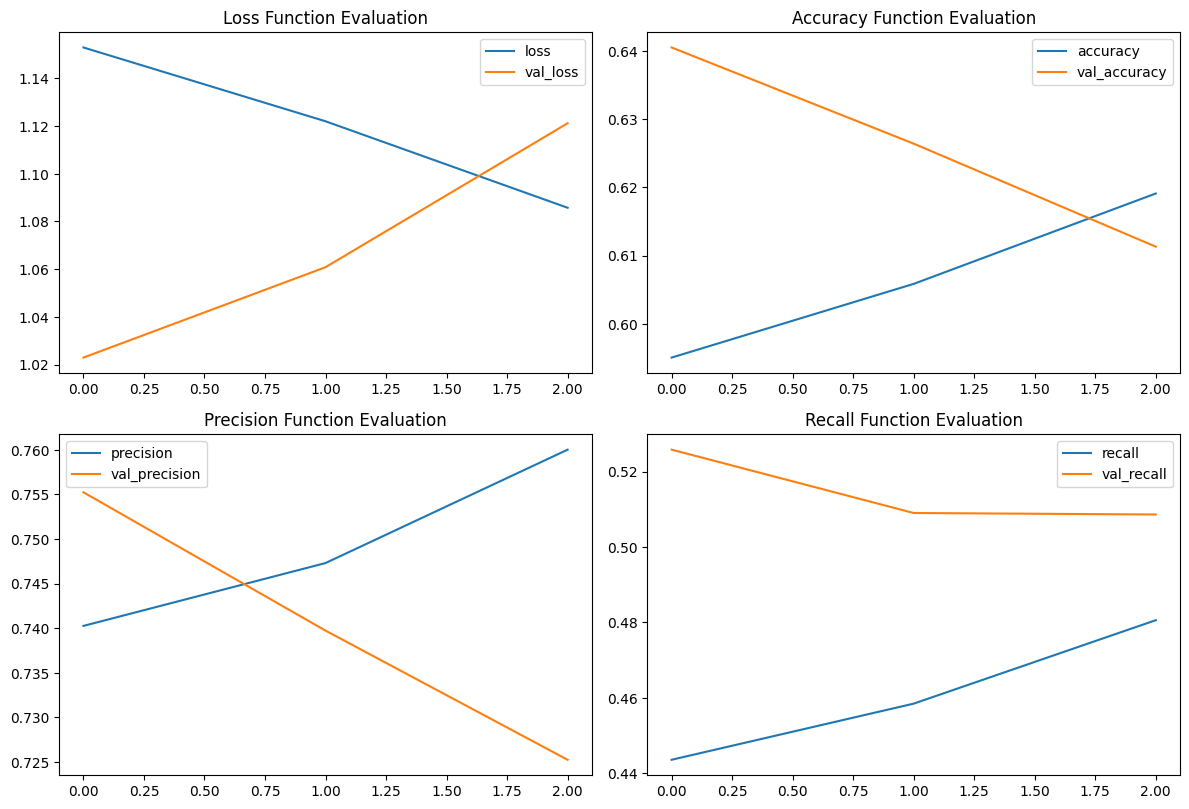

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 16))

# Loss function Evaluation
plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('Loss Function Evaluation')
plt.legend()

# Accuracy Function Evaluation
plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy Function Evaluation")
plt.legend()

# Precision Function Evaluation
plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evaluation')
plt.legend()

# Recall Function Evaluation
plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evaluation')
plt.legend()

plt.tight_layout()
plt.show()
